### Imporeting Libraries.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Cleaned Data

In [72]:
full_data = pd.read_csv('/Users/sahilnakrani/Documents/weather forecast/src/Machine-Learning/Final-Data/Cleaned_Data.csv')

data = full_data[['datetime', 'T']]

data.head()

,datetime,T
0,2014-01-01 01:00:00+00:00,60.0
1,2014-01-01 02:00:00+00:00,62.0
2,2014-01-01 03:00:00+00:00,58.0
3,2014-01-01 04:00:00+00:00,51.0
4,2014-01-01 05:00:00+00:00,47.0


### Set the datetime as a Index.

In [73]:
data = data.set_index("datetime")
data.index = pd.to_datetime(data.index)

## Visualize the data distribution

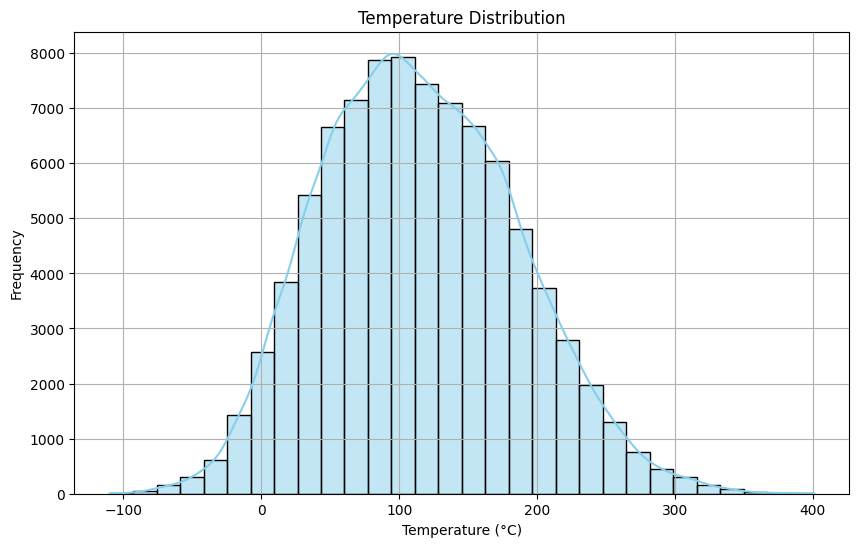

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(data['T'], bins=30, kde=True, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Box-Plot for the outlier detection

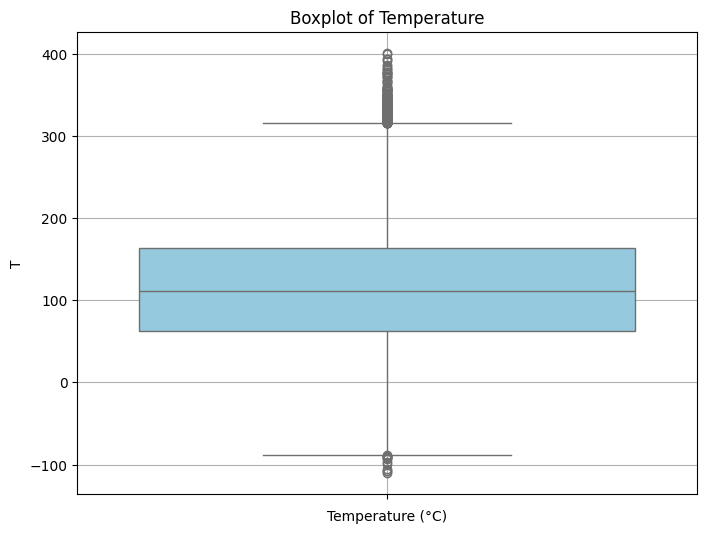

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['T'], color='skyblue')
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.show()

### Autocorrealtion Plot

<Figure size 1000x600 with 0 Axes>

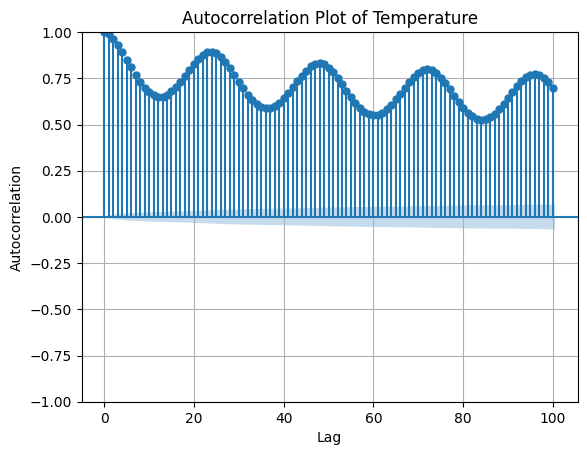

In [76]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(data['T'], lags=100, alpha=0.05)
plt.title('Autocorrelation Plot of Temperature')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### Rolling Statistics

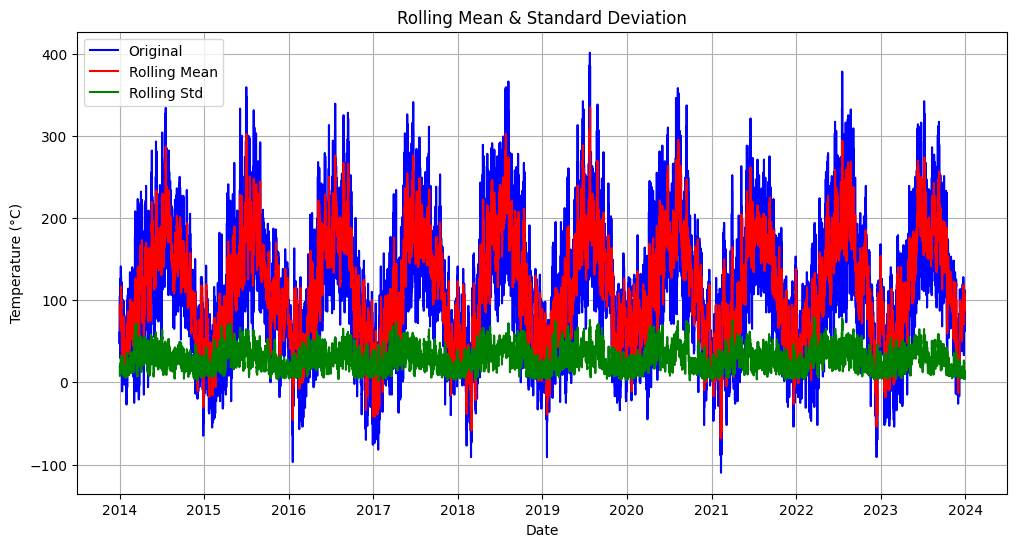

In [77]:
rolling_mean = data['T'].rolling(window=30).mean()
rolling_std = data['T'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['T'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Seasonal Plot

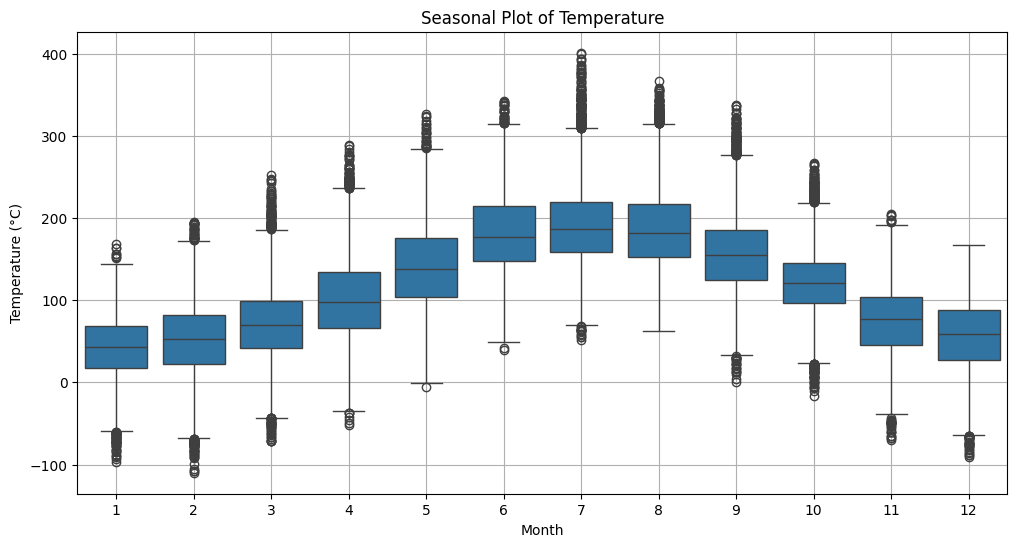

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x=data.index.month, y='T')
plt.title('Seasonal Plot of Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

### Distribution by Day of Week

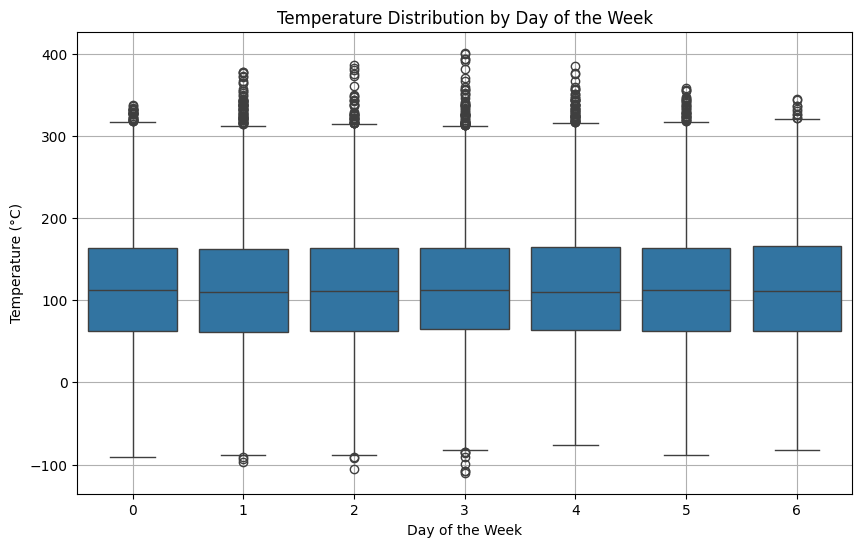

In [79]:
data['DayOfWeek'] = data.index.dayofweek
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='DayOfWeek', y='T')
plt.title('Temperature Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

### Heatmap of Hourly Temperature by Month

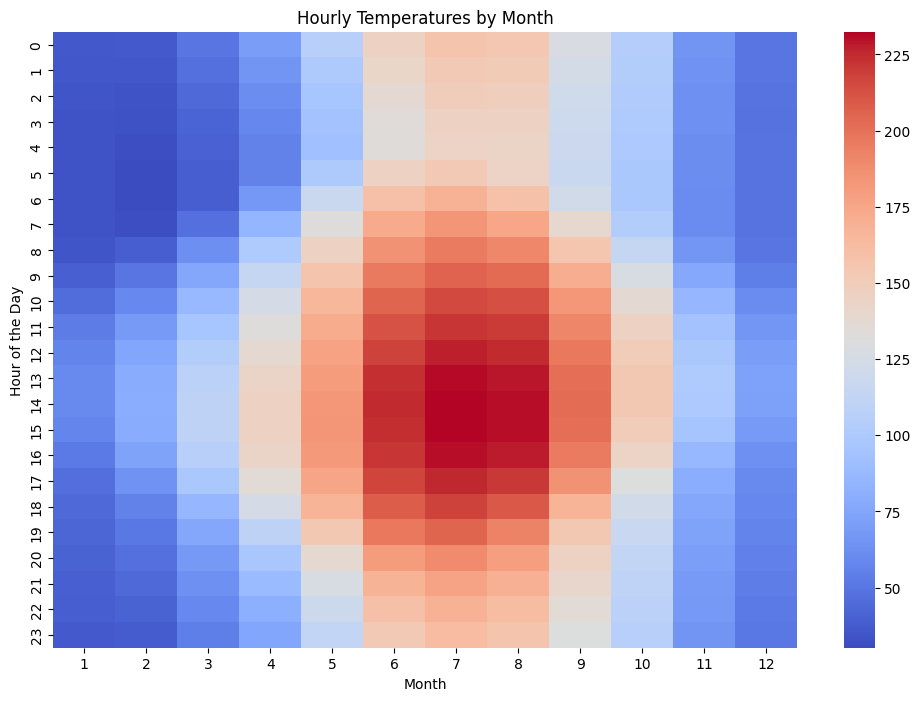

In [80]:
hourly_temperatures = data.groupby([data.index.hour, data.index.month])['T'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_temperatures, cmap='coolwarm')
plt.title('Hourly Temperatures by Month')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')
plt.show()

## Relation between Features.

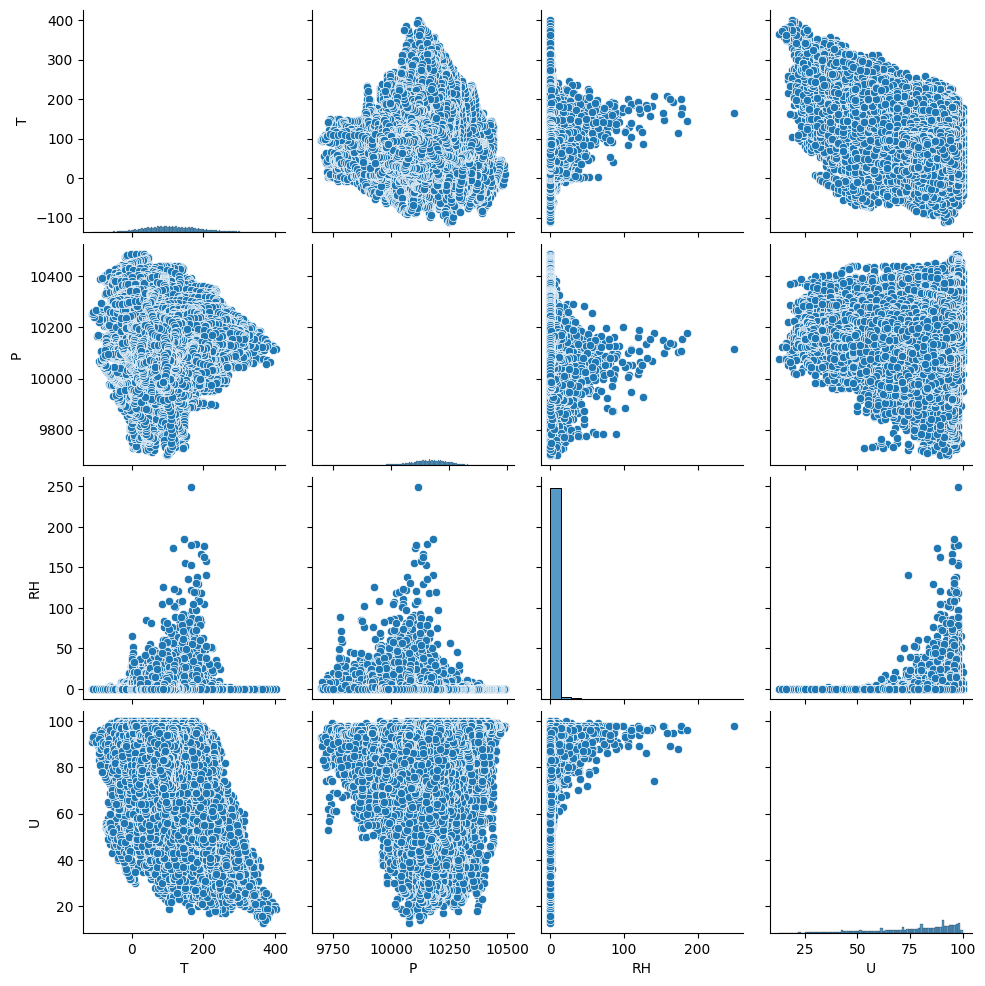

In [81]:
sns.pairplot(full_data)
plt.show()

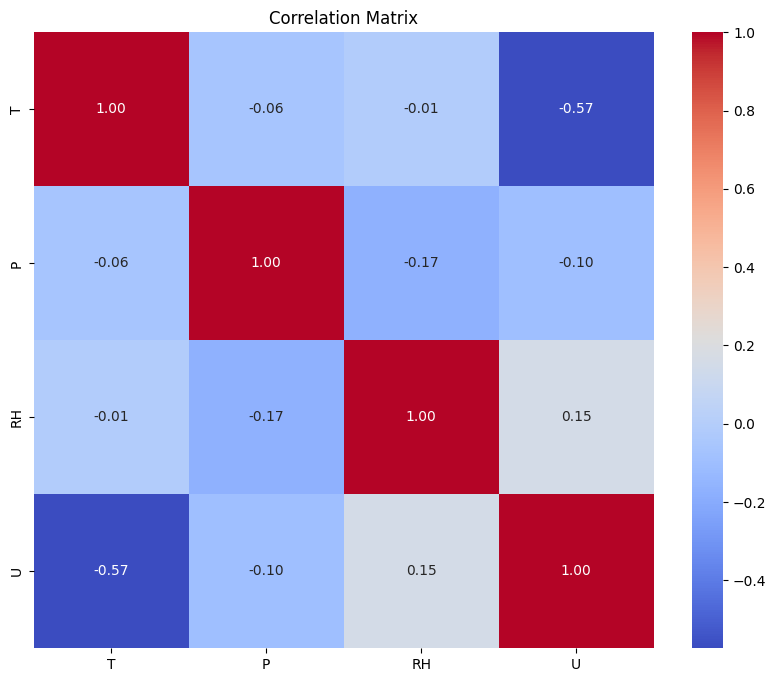

In [82]:
correlation_matrix = full_data[['T','P','RH','U']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()